<a href="https://www.kaggle.com/code/dascient/kepler-exoplanet-target-classification-model?scriptVersionId=122963678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [6]:
# lets begin!
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/kepler-exoplanet-search-results/cumulative.csv',header=0)

/kaggle/input/kepler-exoplanet-search-results/cumulative.csv


In [7]:
df

rowid     kepid kepoi_name   kepler_name koi_disposition  \
0         1  10797460  K00752.01  Kepler-227 b       CONFIRMED   
1         2  10797460  K00752.02  Kepler-227 c       CONFIRMED   
2         3  10811496  K00753.01           NaN  FALSE POSITIVE   
3         4  10848459  K00754.01           NaN  FALSE POSITIVE   
4         5  10854555  K00755.01  Kepler-664 b       CONFIRMED   
...     ...       ...        ...           ...             ...   
9559   9560  10031643  K07984.01           NaN  FALSE POSITIVE   
9560   9561  10090151  K07985.01           NaN  FALSE POSITIVE   
9561   9562  10128825  K07986.01           NaN       CANDIDATE   
9562   9563  10147276  K07987.01           NaN  FALSE POSITIVE   
9563   9564  10156110  K07989.01           NaN  FALSE POSITIVE   

     koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0           CANDIDATE      1.000              0              0              0   
1           CANDIDATE      0.969              0              0              0   
2      FALSE POSITIVE      0.000              0              1              0   
3      FALSE POSITIVE      0.000              0              1              0   
4           CANDIDATE      1.000              0              0              0   
...               ...        ...            ...            ...            ...   
9559   FALSE POSITIVE      0.000              0              0              0   
9560   FALSE POSITIVE      0.000              0              1              1   
9561        CANDIDATE      0.497              0              0              0   
9562   FALSE POSITIVE      0.021              0              0              1   
9563   FALSE POSITIVE      0.000              0              0              1   

      ...  koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  \
0     ...           -81.0      4.467           0.064          -0.096   
1     ...           -81.0      4.467           0.064          -0.096   
2     ...          -176.0      4.544           0.044          -0.176   
3     ...          -174.0      4.564           0.053          -0.168   
4     ...          -211.0      4.438           0.070          -0.210   
...   ...             ...        ...             ...             ...   
9559  ...          -152.0      4.296           0.231          -0.189   
9560  ...          -166.0      4.529           0.035          -0.196   
9561  ...          -220.0      4.444           0.056          -0.224   
9562  ...          -236.0      4.447           0.056          -0.224   
9563  ...          -225.0      4.385           0.054          -0.216   

      koi_srad  koi_srad_err1  koi_srad_err2         ra        dec  koi_kepmag  
0        0.927          0.105         -0.061  291.93423  48.141651      15.347  
1        0.927          0.105         -0.061  291.93423  48.141651      15.347  
2        0.868          0.233         -0.078  297.00482  48.134129      15.436  
3        0.791          0.201         -0.067  285.53461  48.285210      15.597  
4        1.046          0.334         -0.133  288.75488  48.226200      15.509  
...        ...            ...            ...        ...        ...         ...  
9559     1.088          0.313         -0.228  298.74921  46.973351      14.478  
9560     0.903          0.237         -0.079  297.18875  47.093819      14.082  
9561     1.031          0.341         -0.114  286.50937  47.163219      14.757  
9562     1.041          0.341         -0.114  294.16489  47.176281      15.385  
9563     1.193          0.410         -0.137  297.00977  47.121021      14.826  

[9564 rows x 50 columns]

In [8]:
# crucial encoding
lb_make = LabelEncoder()
columns = df.columns.values.tolist()
df_encoded = df[columns].copy()

# categorize/encode
for i in columns:
    df_encoded[i] = lb_make.fit_transform(df[i])

# encoded
df_encoded.head()

rowid  kepid  kepoi_name  kepler_name  koi_disposition  koi_pdisposition  \
0      0   7098        1080         1035                1                 0   
1      1   7098        1081         1036                1                 0   
2      2   7112        1082         2294                2                 1   
3      3   7132        1083         2294                2                 1   
4      4   7136        1084         1867                1                 0   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  \
0        649              0              0              0  ...   
1        618              0              0              0  ...   
2          0              0              1              0  ...   
3          0              0              1              0  ...   
4        649              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0             330       1176              59             339       503   
1             330       1176              59             339       503   
2             235       1253              39             259       444   
3             237       1273              48             267       367   
4             200       1147              65             225       622   

   koi_srad_err1  koi_srad_err2    ra   dec  koi_kepmag  
0             89           1335  3754  7078        3074  
1             89           1335  3754  7078        3074  
2            217           1318  6676  7075        3159  
3            185           1329   880  7158        3307  
4            318           1263  1991  7127        3226  

[5 rows x 50 columns]

In [9]:
df_encoded.sample(1000)

rowid  kepid  kepoi_name  kepler_name  koi_disposition  \
722     722   3285        1923         1224                1   
1543   1543   4400        2560         1322                1   
8411   8411   8063        8794         2294                2   
5567   5567   6596        5095         2294                2   
5778   5778   3086         103         2294                2   
...     ...    ...         ...          ...              ...   
45       45   7571        1101         1874                1   
1277   1277   8121        2063         2115                1   
4541   4541   4606        4360         2294                0   
2273   2273   2565        3558          395                1   
6008   6008   2084        6386         2294                0   

      koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  \
722                  0        649              0              0   
1543                 0        649              0              0   
8411                 1          0              0              1   
5567                 1          0              1              0   
5778                 1        650              0              0   
...                ...        ...            ...            ...   
45                   0        649              0              0   
1277                 0        610              0              0   
4541                 0        323              0              0   
2273                 0        645              0              0   
6008                 0        584              0              0   

      koi_fpflag_co  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
722               0  ...             220       1216              43   
1543              0  ...             328       1446              51   
8411              0  ...             181       1216              49   
5567              1  ...             255       1098             102   
5778              0  ...             376       1557             553   
...             ...  ...             ...        ...             ...   
45                0  ...             328       1161              58   
1277              0  ...             300       1203              48   
4541              0  ...             200       1112              82   
2273              0  ...             325        488             206   
6008              0  ...             102        873             122   

      koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2    ra   dec  \
722              231       517            257           1305  1135  3274   
1543             411        96             15           1345  4195  4421   
8411             206       508            291           1314  6267  8044   
5567             249       611            270           1242  7466  6559   
5778             430      2289           1162           1384  1576  3116   
...              ...       ...            ...            ...   ...   ...   
45               327       531            111           1328  6683  7525   
1277             337       468             97           1339  2026  8101   
4541             232       633            325           1250  8113  4564   
2273             342      1680            431            668  3881  2539   
6008             243      1174            501           1053  7653  2028   

      koi_kepmag  
722         3094  
1543        2766  
8411        2137  
5567        1679  
5778         788  
...          ...  
45          2799  
1277         710  
4541        3541  
2273        2445  
6008         747  

[1000 rows x 50 columns]

In [10]:
     # pairplot
target = 'koi_disposition'
#sns.pairplot(df_encoded.sample(int(len(df_encoded/1000))),hue=target)
sns.pairplot(df_encoded.sample(10),hue=target)

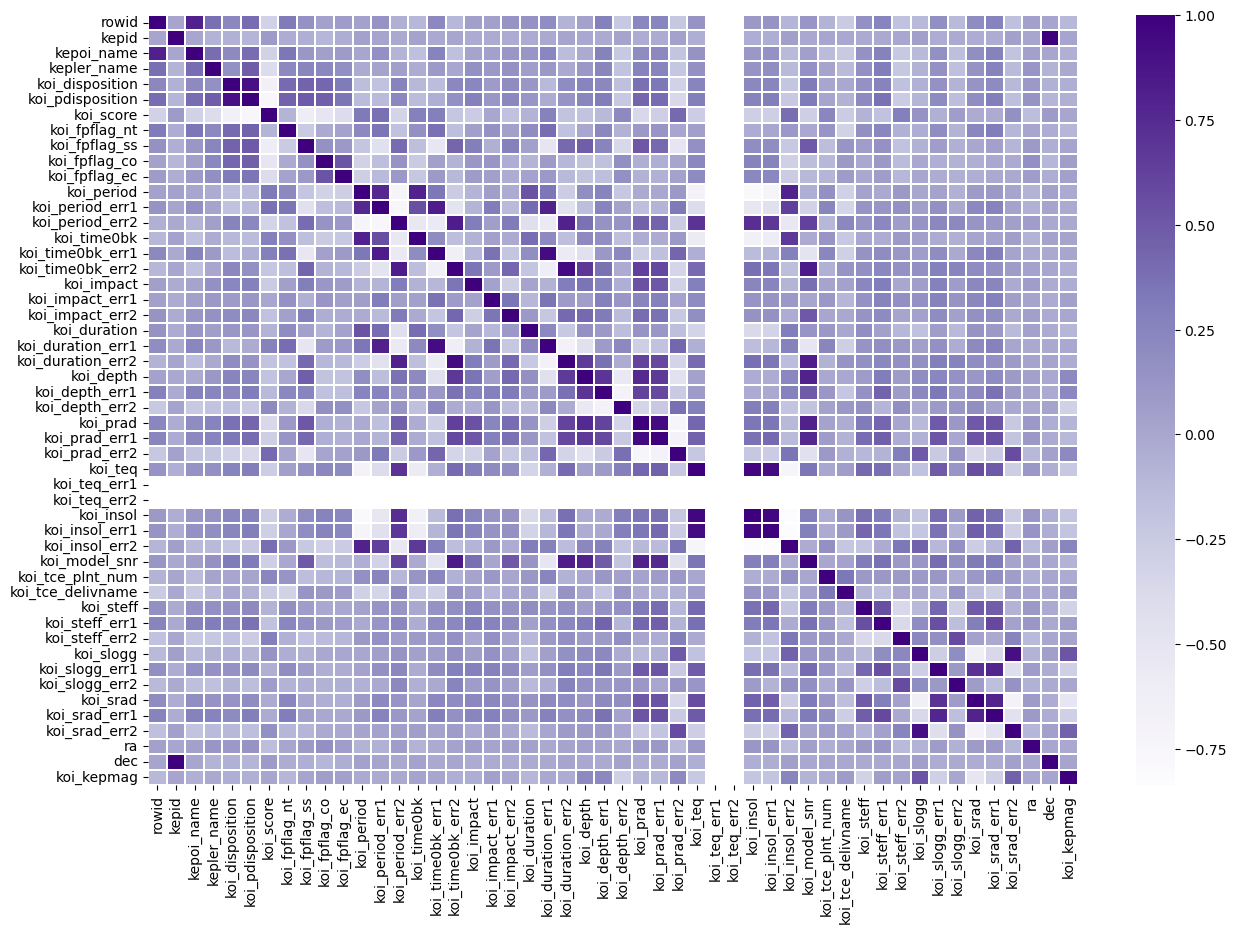

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

corr = df_encoded.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.01, cmap="Purples")
plt.show()

In [12]:
# user can input choice target
#target = input("target:")

X = df_encoded.dropna().drop(columns=[target]).copy()
y = df_encoded.dropna()[target].ravel().copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3157 entries, 9004 to 7822
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   rowid              3157 non-null   int64
 1   kepid              3157 non-null   int64
 2   kepoi_name         3157 non-null   int64
 3   kepler_name        3157 non-null   int64
 4   koi_pdisposition   3157 non-null   int64
 5   koi_score          3157 non-null   int64
 6   koi_fpflag_nt      3157 non-null   int64
 7   koi_fpflag_ss      3157 non-null   int64
 8   koi_fpflag_co      3157 non-null   int64
 9   koi_fpflag_ec      3157 non-null   int64
 10  koi_period         3157 non-null   int64
 11  koi_period_err1    3157 non-null   int64
 12  koi_period_err2    3157 non-null   int64
 13  koi_time0bk        3157 non-null   int64
 14  koi_time0bk_err1   3157 non-null   int64
 15  koi_time0bk_err2   3157 non-null   int64
 16  koi_impact         3157 non-null   int64
 17  koi_impact_

In [13]:
# classifier
#clf = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
clf = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = KNeighborsClassifier().fit(X_train, y_train)
#clf = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)

# results
train_predications = clf.predict(X_train)
train_score = clf.score(X_train, y_train)
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
train_matrix = confusion_matrix(y_train, train_predications)
test_matrix = confusion_matrix(y_test, predictions)
print("Target:",target)
print("TRAIN SCORE:",train_score)
print("TEST SCORE:",score)

Target: koi_disposition
TRAIN SCORE: 1.0
TEST SCORE: 0.9914475768134304


In [ ]:
matrix = pd.DataFrame(test_matrix)

matrix.style.background_gradient(cmap ='Spectral')\
        .set_properties(**{'font-size': '15px'})

<AxesSubplot:>

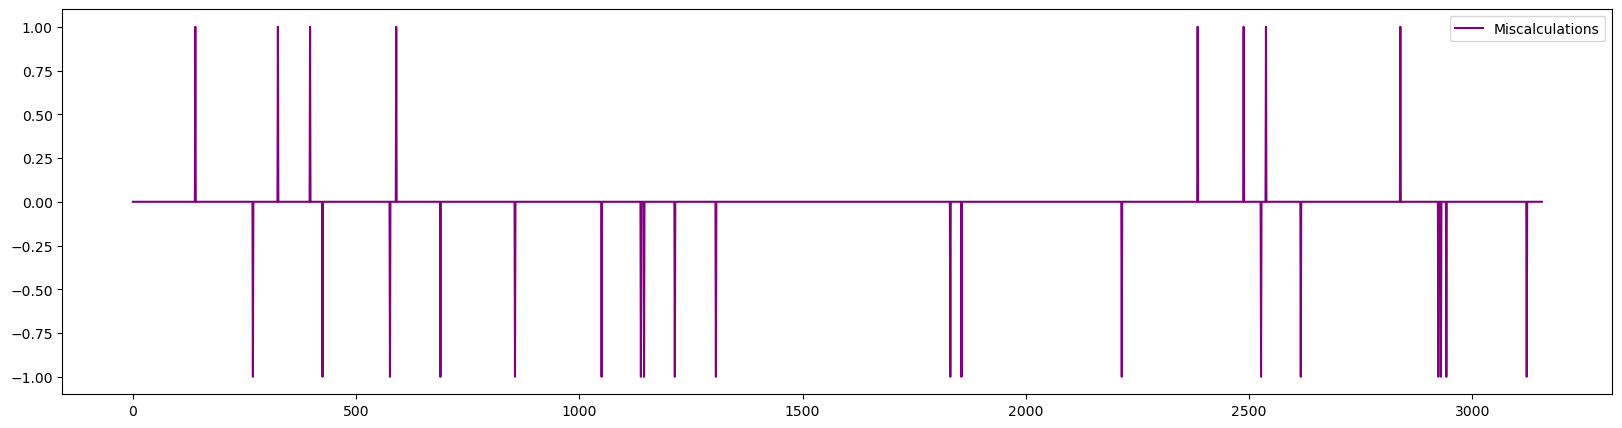

In [15]:
# noise
pd.DataFrame(y_test-clf.predict(X_test),columns=['Miscalculations']).plot(figsize=(20,5),c='purple')

In [16]:
import time

# iterator
def classification_feat_importance(df_encoded):
    
    df_encoded = df_encoded.drop(columns=['koi_impact','koi_depth'])
    
    # iterate through each column variable as classification targets
    for target in df_encoded.columns.values:
        X = df_encoded.dropna().drop(columns=[target]).copy()
        y = df_encoded.dropna()[target].ravel().copy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        time.sleep(30)
        
        # classifiers
        #clf1 = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
        clf2 = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        #clf3 = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        #clf4 = KNeighborsClassifier().fit(X_train, y_train)
        #clf5 = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
        classifiers = [
                       #clf1, 
                       clf2, 
                       #clf3, 
                       #clf4, 
                       #clf5
                      ]

        for classifier in classifiers:
            results = []
            #test_matrix = confusion_matrix(y_test, clf.predict(X_test))
            results.append({"classifier":str(classifier).split("(")[0],"target":target,"test_score":classifier.score(X_test, y_test)})
            print("Classifier:",str(classifier).split("(")[0],"\t\tTarget:",target,"\tScore:",classifier.score(X_test, y_test))
            
    return pd.DataFrame(results)

In [ ]:
classification_feat_importance(df_encoded)

Classifier: AdaBoostClassifier 		Target: rowid 	Score: 0.0
Classifier: AdaBoostClassifier 		Target: kepid 	Score: 0.0
Classifier: AdaBoostClassifier 		Target: kepoi_name 	Score: 0.0
Classifier: AdaBoostClassifier 		Target: kepler_name 	Score: 0.6347798542920494
Classifier: AdaBoostClassifier 		Target: koi_disposition 	Score: 1.0
Classifier: AdaBoostClassifier 		Target: koi_pdisposition 	Score: 0.9996832435856826
Classifier: AdaBoostClassifier 		Target: koi_score 	Score: 0.30598669623059865
Classifier: AdaBoostClassifier 		Target: koi_fpflag_nt 	Score: 0.9578713968957872
Classifier: AdaBoostClassifier 		Target: koi_fpflag_ss 	Score: 0.9287298067785873
Classifier: AdaBoostClassifier 		Target: koi_fpflag_co 	Score: 0.9154260373772569
Classifier: AdaBoostClassifier 		Target: koi_fpflag_ec 	Score: 0.9249287298067785
Classifier: AdaBoostClassifier 		Target: koi_period 	Score: 0.0


In [ ]:
# choose target variable
#target = input("Enter target variable: ")
target = "koi_disposition"

# quick proof of concept
a = df.copy()

# find random sample
from random import randrange
idx = randrange(len(a))

# print random configuration item
b = pd.DataFrame(a.loc[idx]).T
print(f"{target}:",b.reset_index()[target][0])

# store sol'n
solution = b.reset_index()[target][0]

# print data point
b

In [ ]:
# categorize/encode entire dataframe(a)
def encode(df):
    lb_make = LabelEncoder()
    columns = df.columns.values.tolist()
    df_encoded = df[columns].copy()

    # categorize/encode
    for i in columns:
        df_encoded[i] = lb_make.fit_transform(df[i])

    # encoded
    return df_encoded

c = encode(a)
print("\nOriginal dataframe encoded.")

In [ ]:
# print encoded item
use_case = pd.DataFrame(c.loc[idx]).T.drop(columns=[target]) 
#c

# print encoded item w/out target info
data = c.drop(columns=[target]) 
use_case

In [ ]:
# save trainer
print("\nResetting train data...")
trainer = c.loc[c.index!=idx].dropna().copy()
X, y =  trainer.drop(columns=[target]), trainer[target].ravel()
X_train, X_test, y_train, y_test = X_y_sets(trainer, target)[0]

In [ ]:
# encoded variable re-mapping
def encoding_remap(df, df_encoded, target):
    
    X_test = X_y_sets(df, target)[0][0]
    
    remap = pd.merge(df_encoded.loc[df_encoded.index.isin(X_test.index.values)][target].reset_index(),
              df.loc[df.index.isin(X_test.index.values)][[target]].reset_index(),on=['index'])
    
    remap[target] = [str(remap[f'{target}_y'][i]) for i,v in remap[f'{target}_x'].items()]
    remap['index'] = np.array([str(remap[f'{target}_x'][i]) for i,v in remap[f'{target}_x'].items()]).astype(int)
    remap=remap[[target,'index']]
    remap = remap.set_index('index').drop_duplicates().sort_values('index')
    
    return remap

# specific to our current target choice
d = encoding_remap(a, c, target)

In [ ]:
print("\nLive prediction\n")

# choose classifier
#clf = GradientBoostingClassifier(criterion="friedman_mse", init=None, learning_rate=0.033, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=60, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
#clf = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
clf = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
#clf = KNeighborsClassifier().fit(X_train, y_train)


print()
print("Test score: ",clf.score(X_test, y_test))
print()
prediction = clf.predict(use_case)[0]
print(f"Prediction {target}:",prediction)


# print decoded prediction
print("\nPrediction Decoded")
e = d[d.index == prediction]
e

In [ ]:
if solution == e.reset_index()[target][0]:
    print("Machine's prediction was correct!")
else:
    print("Machine's prediction was incorrect :(")

# Supplementary

In [ ]:
# encoding
from sklearn.preprocessing import LabelEncoder
def encode(df):
    lb_make = LabelEncoder()
    columns = df.columns.values.tolist()
    df_encoded = df[columns].copy()

    # categorize/encode
    for i in columns:
        df_encoded[i] = lb_make.fit_transform(df[i])

    # encoded
    return df_encoded


# encoded variable re-mapping
def encoding_remap(df, df_encoded, target):
    
    X_test = X_y_sets(df, target)[0][0]
    
    remap = pd.merge(df_encoded.loc[df_encoded.index.isin(X_test.index.values)][target].reset_index(),
              df.loc[df.index.isin(X_test.index.values)][[target]].reset_index(),on=['index'])
    
    remap[target] = [str(remap[f'{target}_y'][i]) for i,v in remap[f'{target}_x'].items()]
    remap['index'] = np.array([str(remap[f'{target}_x'][i]) for i,v in remap[f'{target}_x'].items()]).astype(int)
    remap=remap[[target,'index']]
    remap = remap.set_index('index').drop_duplicates().sort_values('index')
    
    return remap


# pairplot
import seaborn as sns
def pairplot(df, target):
    return sns.pairplot(df.sample(int(len(df/10000))),hue=target)
    
    
# create X,y variables for ML
from sklearn.model_selection import train_test_split
def X_y_sets(df, target):
    X = df.dropna().drop(columns=[target]).copy()
    y = df.dropna()[target].ravel().copy()
    
    return train_test_split(X, y, test_size=0.33, random_state=42), X, y


# classifier iteration
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
def classification_feat_importance(df_encoded):
    
    df_encoded = df_encoded.drop(columns=['capital-gain','capital-loss'])
    
    # iterate through each column variable as classification targets
    for target in df_encoded.columns.values:
        X = df_encoded.dropna().drop(columns=[target]).copy()
        y = df_encoded.dropna()[target].ravel().copy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        time.sleep(30)
        
        # classifiers
        clf1 = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
        clf2 = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        clf3 = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        clf4 = KNeighborsClassifier().fit(X_train, y_train)
        clf5 = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
        classifiers = [
                       clf1, 
                       clf2, 
                       clf3, 
                       clf4, 
                       clf5
                      ]

        for classifier in classifiers:
            results = []
            #test_matrix = confusion_matrix(y_test, clf.predict(X_test))
            results.append({"classifier":str(classifier).split("(")[0],"target":target,"test_score":classifier.score(X_test, y_test)})
            print("Classifier:",str(classifier).split("(")[0],"\t\tTarget:",target,"\tScore:",classifier.score(X_test, y_test))
            
    return pd.DataFrame(results)